In [3]:
!pip install scikit-image

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_image-0.19.3-cp310-cp310-win_amd64.whl (12.0 MB)
  Using cached networkx-2.8.6-py3-none-any.whl (2.0 MB)
  Using cached imageio-2.22.0-py3-none-any.whl (3.4 MB)
  Using cached PyWavelets-1.4.1-cp310-cp310-win_amd64.whl (4.2 MB)
  Using cached Pillow-9.2.0-cp310-cp310-win_amd64.whl (3.3 MB)
  Using cached scipy-1.9.1-cp310-cp310-win_amd64.whl (38.6 MB)
  Using cached tifffile-2022.8.12-py3-none-any.whl (208 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [5]:
!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.6.0-cp310-cp310-win_amd64.whl (7.2 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.4.4-cp310-cp310-win_amd64.whl (55 kB)
  Using cached fonttools-4.37.3-py3-none-any.whl (959 kB)
  Using cached contourpy-1.0.5-cp310-cp310-win_amd64.whl (164 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [7]:
!pip install pytesseract

Defaulting to user installation because normal site-packages is not writeable
  Using cached pytesseract-0.3.10-py3-none-any.whl (14 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
from skimage import data, io
import numpy as np
import cv2
import matplotlib.pyplot as plt
#import easyocr
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

opencv_frame_0.png written!
opencv_frame_1.png written!
Escape hit, closing...


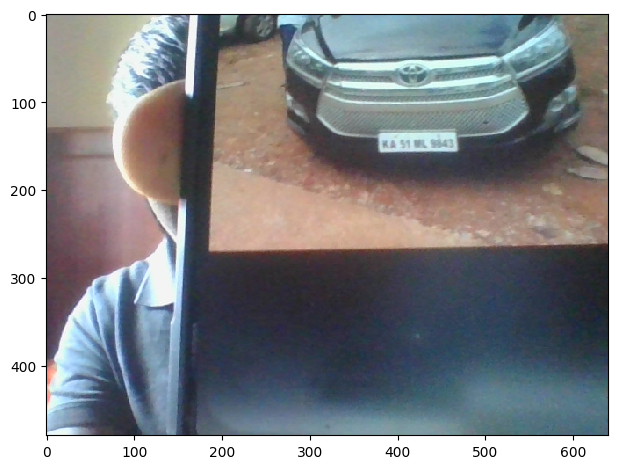

In [2]:
cam = cv2.VideoCapture(0)

cv2.namedWindow("test")

img_counter = 0

while True:
	ret, frame = cam.read()
	if not ret:
		print("failed to grab frame")
		break
	cv2.imshow("test", frame)

	k = cv2.waitKey(1)
	if k % 256 == 27:
		# ESC pressed
		print("Escape hit, closing...")
		break
	elif k % 256 == 32:
		# SPACE pressed
		img_name = "opencv_frame_{}.png".format(img_counter)
		cv2.imwrite(img_name, frame)
		print("{} written!".format(img_name))
		img_counter += 1

cam.release()

cv2.destroyAllWindows()

img = io.imread('opencv_frame_0.png')
io.imshow(img)

In [13]:
#img = cv2.imread('msir.jpg')
#cv2.imshow('image',img)


[[[158 157 152]
  [157 156 151]
  [155 154 149]
  ...
  [140 142 130]
  [146 146 136]
  [149 149 139]]

 [[159 158 153]
  [158 157 152]
  [156 155 150]
  ...
  [132 134 121]
  [136 137 124]
  [138 138 127]]

 [[157 156 152]
  [157 156 152]
  [156 155 151]
  ...
  [128 131 115]
  [128 130 115]
  [129 131 116]]

 ...

 [[206 222 255]
  [218 234 255]
  [227 243 255]
  ...
  [ 81 104 122]
  [ 79 105 122]
  [ 77 106 122]]

 [[232 247 255]
  [230 245 255]
  [229 244 255]
  ...
  [ 80 105 124]
  [ 77 105 123]
  [ 76 106 123]]

 [[229 245 255]
  [232 247 255]
  [231 246 255]
  ...
  [ 80 107 126]
  [ 77 107 125]
  [ 75 106 124]]]


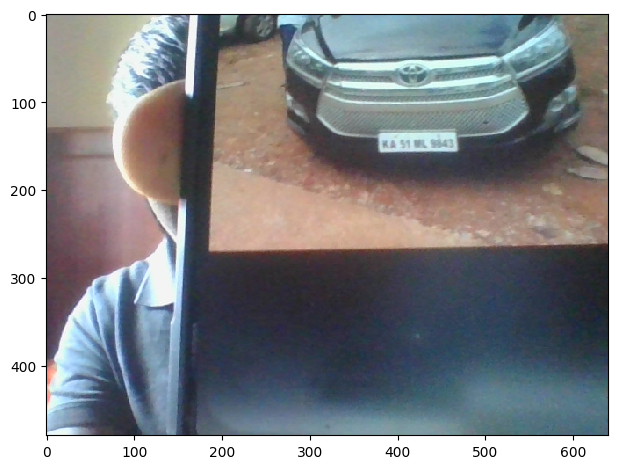

In [4]:
#img = io.imread('msir.jpg')
img = io.imread(r'D:\final year project BU\opencv_frame_0.png') # please replace with path to any image in your system
io.imshow(img)
print(img)

Number of detected licence plates: 0


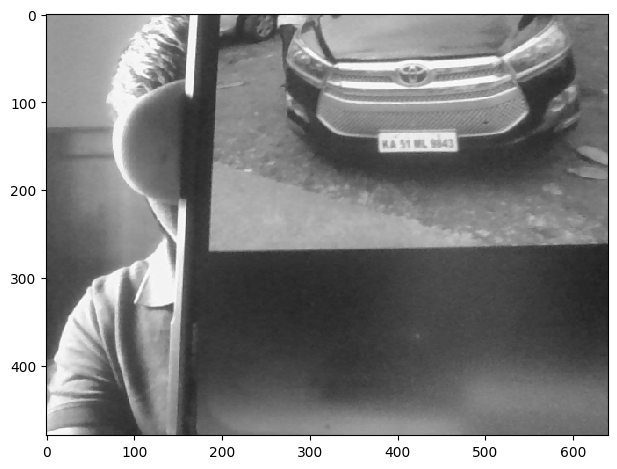

In [5]:
#read haarcascade
plates_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml') 
#plates_cascade = cv2.CascadeClassifier('cascade.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plates = plates_cascade.detectMultiScale(gray, 1.2, 4)
for (x,y,w,h) in plates:

    plates_rec = cv2.rectangle(gray, (x,y), (x+w, y+h), (255,255,255),3)  
    plates_rec_ = cv2.rectangle(img, (x,y), (x+w, y+h), (255,255,255),3)

    color_plates = img[y:y+h, x:x+w] 
    gray_plates = gray[y:y+h, x:x+w]

    #height, width, chanel = gray_plates.shape
    #print(height, width)
io.imshow(gray)
#cv2_imshow(img)
#cv2.waitKey(0)
print('Number of detected licence plates:', len(plates))

In [7]:
resized_color =cv2.resize(color_plates, (350, 100))
io.imshow(resized_color)
resized_color.shape

NameError: name 'color_plates' is not defined

(100, 350)

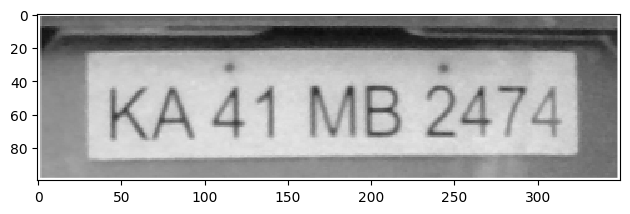

In [16]:
resized_gray =cv2.resize(gray_plates, (350, 100))
io.imshow(resized_gray)
resized_gray.shape

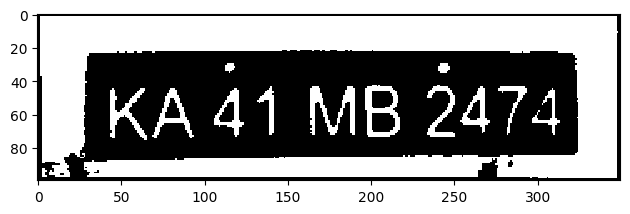

In [17]:
ret, binary = cv2.threshold(resized_gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
io.imshow(binary)


In [18]:
cnts, new = cv2.findContours(binary.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
sorted_contours = sorted(cnts, key=lambda ctr: cv2.boundingRect(ctr)[0])

In [23]:
im2 = binary.copy()
plate_num = ''
plate_num1 = []
for c in sorted_contours:
    x,y,w,h = cv2.boundingRect(c)
    if h>= 25 and h<=60 and w<=40 and w>= 10:
        rect = cv2.rectangle(im2, (x,y), (x+w, y+h), (255,0,0),1)
        io.imsave('1.jpg',rect)
        roi = binary[y-5:y+h+5, x-5:x+w+5]
        roi = cv2.resize(roi,(64,64))
        roi = cv2.medianBlur(roi, 5)

        ocr(roi)
text = pytesseract.image_to_string(roi, 
                             config='-c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ --psm 8 --oem 3')
plate_num = plate_num+text
plate_num =  plate_num.replace('\n','')
print(plate_num,end = '')    
        #result = reader.readtext(roi,paragraph = 'False',detail  = 0, allowlist = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
        
        #plate_num1 = plate_num1+result


KA44M1S2A744

In [24]:
    
    plate_num = ''
    text = pytesseract.image_to_string(roi, 
                    config='-c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ --psm 8 --oem 3')
    plate_num = plate_num+text
    plate_num =  plate_num.replace('\n','')
    print(plate_num,end = '')

4